In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
os.chdir ("C:\\Users\\Hp\\Desktop\\Chaimae\\stage\\PFE\\Dataset\\clean_data")
cwd=os.getcwd()
print(cwd)
df=pd.read_excel('dataprepro.xlsx')

C:\Users\Hp\Desktop\Chaimae\stage\PFE\Dataset\clean_data


In [3]:
df.head()

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,Year_dep,...,Hour_dep,minute_dep,day_arr,weekday_name_arr,minute_arr,Hour_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,18.5436,2018,...,21,31,31,Tuesday,31,21,1,7,4,Voiture
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,80.6420,2018,...,11,12,29,Sunday,12,11,3,50,2,Voiture
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,194.8008,2018,...,6,24,15,Sunday,24,6,19,29,2,Voiture
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,81.2457,2018,...,6,0,5,Wednesday,0,6,9,33,2,Voiture
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,142.7762,2018,...,15,30,23,Wednesday,30,15,5,39,4,Voiture


In [29]:
from sklearn import preprocessing
import numpy as np
# Import the encoder from sklearn
le = preprocessing.LabelEncoder()

# Encode the features
df['encoded_ville_dep']=le.fit_transform(df['Ville de depart'])
encoded_ville_arr=le.fit_transform(df["Ville d'arrivée"])
encoded_weekday_name_dep=le.fit_transform(df['weekday_name_dep'])
encoded_weekday_name_arr=le.fit_transform(df['weekday_name_arr'])
df['encoded_Moyen_de_transport']=le.fit_transform(df['Moyen_de_transport'])

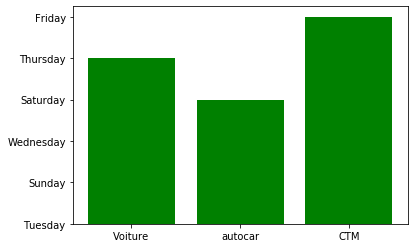

In [30]:
import matplotlib.pyplot as plt
plt.bar(df['Moyen_de_transport'],df['weekday_name_dep'],color = 'g')
plt.show()

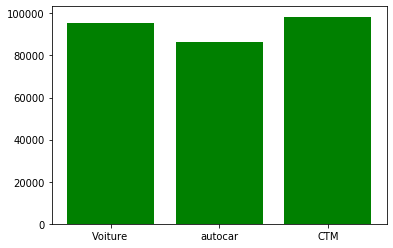

In [14]:
import matplotlib.pyplot as plt
plt.bar(df['Moyen_de_transport'],df['Id_User'],color = 'g')
plt.show()

In [32]:
import matplotlib.pyplot as plt
plt.hist(column='encoded_ville_dep',by='encoded_moyen_transport')
plt.show()

TypeError: hist() missing 1 required positional argument: 'x'

In [37]:
df.loc[74517:, 'encoded_Moyen_de_transport'].head()


Series([], Name: encoded_Moyen_de_transport, dtype: int32)

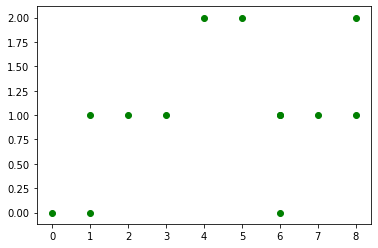

In [39]:
plt.scatter(df['encoded_ville_dep'], df['encoded_Moyen_de_transport'],color='green')

In [15]:
#extract the categorial featuers
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Ville de depart,Ville d'arrivée,weekday_name_dep,weekday_name_arr,Moyen_de_transport
0,RABAT,CASABLANCA,Tuesday,Tuesday,Voiture
1,CASABLANCA,TAZA,Sunday,Sunday,Voiture
2,KHENIFRA,AGADIR,Sunday,Sunday,Voiture
3,RABAT,TETOUAN,Wednesday,Wednesday,Voiture
4,OUARZAZATE,TEMARA,Wednesday,Wednesday,Voiture


In [16]:
pd.get_dummies(obj_df, columns=["Ville de depart", "Ville d'arrivée","weekday_name_dep","weekday_name_arr","Moyen_de_transport"], prefix=["depart", "arrivee","week_dep","week_arr","transport"]).head()

,depart_AGADIR,depart_AL HOCEIMA,depart_BENI MELLAL,depart_BERKANE,depart_BERRECHID,depart_CASABLANCA,depart_ELJADIDA,depart_ERRACHIDIA,depart_ESSAOUIRA,depart_FES,...,week_arr_Friday,week_arr_Monday,week_arr_Saturday,week_arr_Sunday,week_arr_Thursday,week_arr_Tuesday,week_arr_Wednesday,transport_CTM,transport_Voiture,transport_autocar
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [17]:
df.head()

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,Year_dep,...,Hour_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,encoded_ville_dep,encoded_ville_arr,encoded_weekday_name_dep,encoded_weekday_name_arr,encoded_moyen_transport
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,18.5436,2018,...,21,1,7,4,Voiture,22,5,5,5,1
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,80.6420,2018,...,11,3,50,2,Voiture,5,28,3,3,1
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,194.8008,2018,...,6,19,29,2,Voiture,13,0,3,3,1
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,81.2457,2018,...,6,9,33,2,Voiture,22,30,6,6,1
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,142.7762,2018,...,15,5,39,4,Voiture,19,29,6,6,1


In [66]:
df.drop(['Ville de depart',"Ville d'arrivée","weekday_name_dep","weekday_name_arr","Moyen_de_transport"],axis=1,inplace=True)

In [67]:
df.head()

,Id_User,Latitude,Longitude,Latitude.1,Longitude.1,Distance,prix,Year_dep,Month_dep,day_dep,...,OUJDA,RABAT,SAFI,SEFROU,SETTAT,SIDI KACEM,TANGER,TAZA,TEMARA,TETOUAN
0,74517,34.022405,-6.834543,33.595063,-7.618777,92.718000,18.5436,2018,7,31,...,0,1,0,0,0,0,0,0,0,0
1,90486,33.595063,-7.618777,34.230155,-4.010104,403.209999,80.6420,2018,4,29,...,0,0,0,0,0,0,0,0,0,0
2,69046,32.935772,-5.669650,30.422037,-9.559509,649.335999,194.8008,2018,7,15,...,0,0,0,0,0,0,0,0,0,0
3,86417,34.022405,-6.834543,35.570175,-5.374278,270.819000,81.2457,2018,12,5,...,0,1,0,0,0,0,0,0,0,0
4,79358,30.920193,-6.910923,33.917166,-6.923804,509.914999,142.7762,2018,5,23,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn import preprocessing
import numpy as np
# Import the encoder from sklearn
le = preprocessing.LabelEncoder()

# Encode the features
df['encoded_ville_dep']=le.fit_transform(df['Ville de depart'])
df['encoded_ville_arr']=le.fit_transform(df["Ville d'arrivée"])
df['encoded_weekday_name_dep']=le.fit_transform(df['weekday_name_dep'])
df['encoded_weekday_name_arr']=le.fit_transform(df['weekday_name_arr'])
df['encoded_moyen_transport']=le.fit_transform(df['Moyen_de_transport'])

In [12]:
df.head()

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,Year_dep,...,Hour_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,encoded_ville_dep,encoded_ville_arr,encoded_weekday_name_dep,encoded_weekday_name_arr,encoded_moyen_transport
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,18.5436,2018,...,21,1,7,4,Voiture,22,5,5,5,1
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,80.6420,2018,...,11,3,50,2,Voiture,5,28,3,3,1
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,194.8008,2018,...,6,19,29,2,Voiture,13,0,3,3,1
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,81.2457,2018,...,6,9,33,2,Voiture,22,30,6,6,1
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,142.7762,2018,...,15,5,39,4,Voiture,19,29,6,6,1


In [13]:
df.head()

,Id_User,Ville de depart,Latitude,Longitude,Ville d'arrivée,Latitude.1,Longitude.1,Distance,prix,Year_dep,...,Hour_arr,hour_duree,minute_duree,nombre_place,Moyen_de_transport,encoded_ville_dep,encoded_ville_arr,encoded_weekday_name_dep,encoded_weekday_name_arr,encoded_moyen_transport
0,74517,RABAT,34.022405,-6.834543,CASABLANCA,33.595063,-7.618777,92.718000,18.5436,2018,...,21,1,7,4,Voiture,22,5,5,5,1
1,90486,CASABLANCA,33.595063,-7.618777,TAZA,34.230155,-4.010104,403.209999,80.6420,2018,...,11,3,50,2,Voiture,5,28,3,3,1
2,69046,KHENIFRA,32.935772,-5.669650,AGADIR,30.422037,-9.559509,649.335999,194.8008,2018,...,6,19,29,2,Voiture,13,0,3,3,1
3,86417,RABAT,34.022405,-6.834543,TETOUAN,35.570175,-5.374278,270.819000,81.2457,2018,...,6,9,33,2,Voiture,22,30,6,6,1
4,79358,OUARZAZATE,30.920193,-6.910923,TEMARA,33.917166,-6.923804,509.914999,142.7762,2018,...,15,5,39,4,Voiture,19,29,6,6,1


In [34]:
df.index

RangeIndex(start=0, stop=688719, step=1)

In [44]:
encoded_moyen_transport=np.array([[0], 
                      [1],
                      [2]])
# Create one-hot-encoder and specify the columns in the dataset where categorical
# features can be found
ohe=preprocessing.OneHotEncoder(categorical_features=[0])
# Perfrom one-hot-encoding
#print(encoded_ville_dep)
one_hot_encoded_moyen_transport=ohe.fit_transform(encoded_moyen_transport).toarray()
# Print the result
print(one_hot_encoded_moyen_transport)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[74517, 'RABAT', 34.022405, ..., 7, 4, 'Voiture'],
       [90486, 'CASABLANCA', 33.5950627, ..., 50, 2, 'Voiture'],
       [69046, 'KHENIFRA', 32.9357718, ..., 29, 35, 'autocar'],
       ...,
       [99781, 'ELJADIDA', 36.8603699, ..., 12, 12, 'CTM'],
       [93331, 'MEKNES', 42.6515447, ..., 11, 4, 'Voiture'],
       [68108, 'TAZA', 34.230155, ..., 43, 22, 'autocar']], dtype=object)

In [11]:
df.to_excel('C:\\Users\\Hp\\Desktop\\Chaimae\\stage\\PFE\\Dataset\\clean_data\\datapreprocessing.xlsx')